# Fontes de dados 
## Trabalhando com Python

## De onde obtemos os dados?

1- **De alguma base de dados (csv, excel, etc)** - é preciso ler o arquivo

2- **De algum website (web scraping)** - é preciso fazer a raspagem do website

3- **Usando alguma API (application programming interface)**-  interface ou protocolo de comunicação entre um cliente e um servidor destinado a simplificar a construção de software do lado do cliente. 


# 1- Abrindo um arquivo Excel 

Vamos criar um arquivo excel, salvar na mesma pasta desse notebook, e abrir por aqui

Ao apertar a tecla TAB após o .read, vamos ter acesso às opções disponíveis de arquivos
que podemos abrir

In [ ]:
# Abrindo arquivo excel (para abrir de forma direta, o arquivo deve estar na mesma pasta)
import pandas as pd
pd.read_excel('teste.xlsx')

# Abrindo um arquivo em formato CSV

In [ ]:
# Abrindo um arquivo csv  CSV (valores separados por vírgulas):
# O arquivo pode estar em qualquer lugar. Precisamos indicar o caminho

import pandas as pd
url= ('https://github.com/thaissalzer/thaissalzer/blob/d712d416e5ad901113d52ffc0c23fd7e1366c044/salarios_RAIS.csv?raw=true')
df= pd.read_csv(url)
df.head()

# 2- Usando alguma API 

# (Application Programming Interface)

# interface de programação do aplicativo





Algo que permite comunicação da página fim com nosso programa. 


Facilita a troca de informação, gerenciamento de informação, buscar bases de dados.


É um protocolo cliente-servidor baseado em um ciclo de solicitação/resposta (request/response)



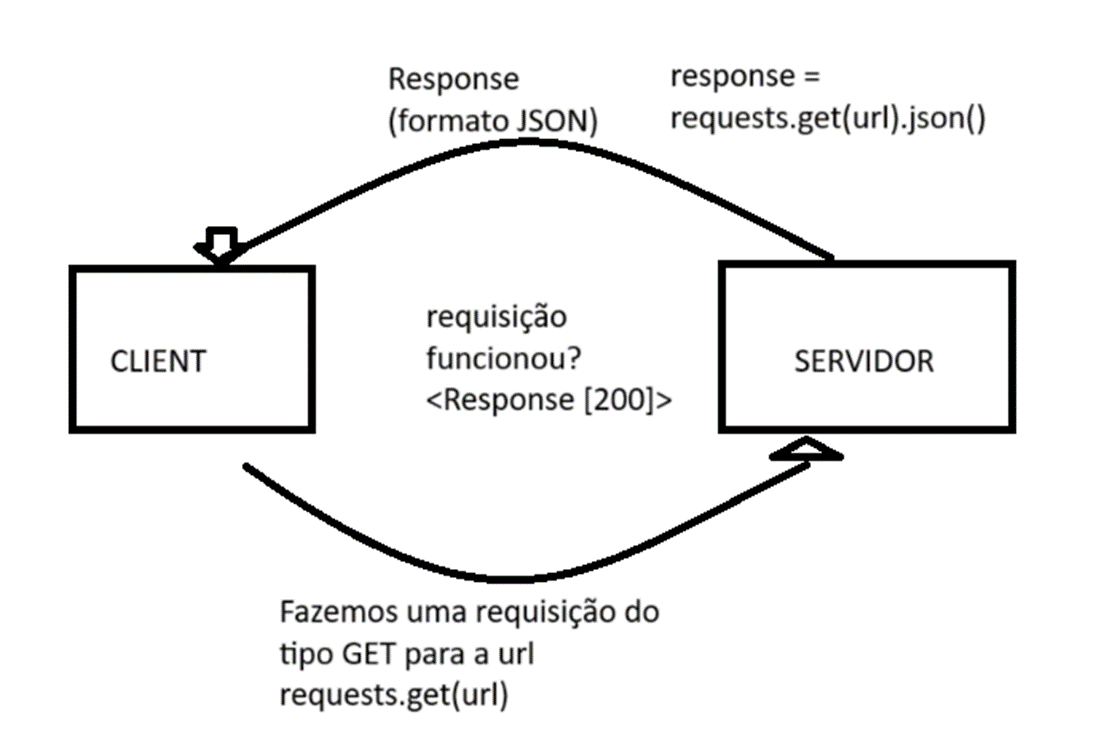

JSON é uma estrutura de dados que é mto similar a um dicionário. Basicamente temos um key value que nos permite buscar informação


# exemplos de API

https://opencollective.com/public-apis

# Vamos começar com um exemplo de requisição básica de dados da Câmara dos deputados

In [ ]:
#!pip install requests
import requests

# Endpoint da API de deputados da Câmara
url = "https://dadosabertos.camara.leg.br/api/v2/deputados"

#quero verificar se a requisição foi bem sucedida
requests.get(url)



In [ ]:
# ver a resposta no formato json

response = requests.get(url).json()
response

In [ ]:
deputados = response['dados']


for deputado in deputados:
    print(deputado["nome"])
    

In [ ]:
# Agora quero deputados apenas de MG

for deputado in deputados:
    if deputado['siglaUf']=='MG':
        print(deputado["nome"])

In [ ]:
#criando uma lista com os nomes dos deputados
nomes_deputados = []
for deputado in deputados:
    nomes_deputados.append(deputado["nome"])

nomes_deputados

#quantos são?

len(nomes_deputados)



# Vamos ver os projetos que tramitaram na ultima semana

In [ ]:
url = 'https://dadosabertos.camara.leg.br/api/v2/proposicoes?dataInicio=2023-08-20&dataFim=2023-08-25&ordem=ASC&ordenarPor=id'


In [ ]:
#quero verificar se a requisição foi bem sucedida
requests.get(url)

In [ ]:
# resposta no formato json
response = requests.get(url).json()

projetos = response['dados']

In [ ]:
len( projetos)

In [ ]:

for projeto in projetos:
    print(projeto["siglaTipo"] + " " + str(projeto["numero"]) + " " + str(projeto["ano"]) + " " + projeto["ementa"] )

# Web Scraping

BeaultifulSoup

é um pacote Python para analisar documentos HTML e XML. Ele cria uma árvore de análise para páginas analisadas que podem ser usadas para extrair dados de HTML, o que é útil para web scraping. Wikipedia

In [ ]:
# !pip install beautifulsoup4
from bs4 import BeautifulSoup


Quando e digito no meu navegador uma página (ex: www.g1.com.br) estou solicitando uma página para um servidor. Esse servidor atende a solicitação e manda a pag para seu computador .
Para trazer essa página para o seu computador, é preciso de um protocolo (http) que faz o transporte da página.(faz o download dessa pag para sua maquina)


Já o HTML é o formato da página/ (linguagem de marcação utilizada na construção de páginas na Web.)
ela marca o que é cada coisa no código por meio das tags

ex: <title>
    <p> - para parágrafo
    <img> imagem
    
        
o html é dividido em head e body

        
 

Exemplo de uma pág HTML

        
<!DOCTYPE html>
<html>
<head>
    <title>Exemplo de Página HTML</title>
</head>
<body>
    <header>
        <h1>Minha Primeira Página HTML</h1>
    </header>
    
    <nav>
        <ul>
            <li><a href="https://www.instagram.com/thais_salzer/">Home</a></li>
            <li><a href="#">Sobre</a></li>
            <li><a href="#">Contato</a></li>
        </ul>
    </nav>
    
    <main>
        <p>Bem-vindo à minha primeira página HTML!</p>
        <p>Esta é uma página de exemplo para demonstrar a estrutura básica do HTML.</p>
    </main>
    
    <footer>
        <p>&copy; 2023 Thaís Company. Rua XXX</p>
    </footer>
</body>
</html>
        
       

In [ ]:
'''' 
Neste exemplo:

<!DOCTYPE html>: Define o tipo de documento como HTML5.
<html>...</html>: Define o início e o fim do documento HTML.
<head>...</head>: Contém informações sobre o documento, como o título da página.
<title>...</title>: Define o título da página exibido na aba do navegador.
<body>...</body>: Contém o conteúdo visível da página.
<header>...</header>: Define um cabeçalho para a página.
<h1>...</h1>: Cria um cabeçalho de nível 1 (o maior).
<nav>...</nav>: Define uma área de navegação.
<ul>...</ul>: Cria uma lista não ordenada.
<li>...</li>: Define um item da lista.
<a href="#">...</a>: Cria um link vazio para fins de exemplo.
<main>...</main>: Define o conteúdo principal da página.
<p>...</p>: Cria parágrafos de texto.
<footer>...</footer>: Define o rodapé da página.
&copy;: Entidade HTML para o símbolo de direitos autorais.
Este é apenas um exemplo básico. O HTML pode ser muito mais complexo, com mais elementos, estilos CSS, interatividade JavaScript e muito mais.
'''

Mas nosso objetivo aqui não é aprender a montar um HTML, mas sim, saber fazer um web scraping, (coletar informações da página de interesse)

# O pacote Python para navegar em HTML se chama BeautifulSoup

Documentação: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [ ]:
# importando as bibliotecas que serão utilizadas
# se ainda não tem o pacote instalado: 
# !pip install beautifulsoup4

import requests 
from bs4 import BeautifulSoup

In [ ]:
# Como funciona?

# pegando as informações da URL e verificando se a requisição foi bem sucedida
url = 'https://g1.globo.com/'
response = requests.get(url) #para "pegar" informações da url

print(response)

In [ ]:
# verificando o conteúdo da pag
conteudo = response.content

In [ ]:
# vamos criar um objeto BeautifulSoup a partir de um conteúdo HTML
site = BeautifulSoup(conteudo, 'html.parser') # tenho que especificar o arquivo e o formato do conteúdo


In [ ]:
# agora vamos atrás das notícias que queremos
# inspecionar a pagina do g1.globo.com e encontrar o caminho para se chegar nas news
# find x find_all

noticias_html = site.find('div', class_='feed-post-body')
noticias_html

In [ ]:
#encontrando o titulo da noticia
noticias_html.find('a').find('h2').string

In [ ]:
#encontrando o link da noticia

noticias_html.find('a')['href']

In [ ]:
# já fizemos o passo a passo para encontrar uma. Agora vamos encontrar todas:

noticias_html = site.find_all('div', class_='feed-post-body')
noticias = []
for noticia in noticias_html:
    titulo = noticia.find('a').find('h2').string
    link = noticia.find('a')['href']
    noticias.append({'titulo': titulo, 'link': link})
    
print(noticias)

In [ ]:
# Apresentando de uma forma mais amigável:
for dicionario in noticias:
    print(f"{dicionario['titulo']}")
    print(f"{dicionario['link']}")
    print()